<a href="https://colab.research.google.com/github/elinthind/influenza_model/blob/main/MakingPrettyGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1on1ujhKxIhCVXKdihVwnM3ce5ciGmj88'
downloaded = drive.CreateFile({'id': file_id})
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
#try to get the raw downloaded file into pretty pandas thing
file_name = 'TravelMatrix.npy'
downloaded.GetContentFile(file_name)

Array = np.load(file_name)


In [ ]:
#61.2181° N, 149.9003° W

#our lats and longs go fromm 51-188

Alat = 61-51
Along = 149-51

print(np.argmax(Array[Alat, Along])) #okay we're good

1468


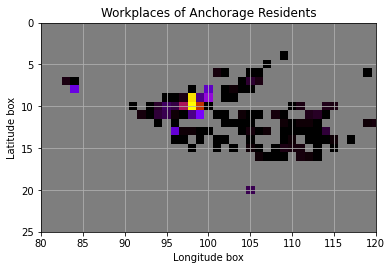

In [ ]:
#this is a map of where people in anchorage work
Anchorage = Array[:,:, Alat, Along]
#Note: Anchorage, Anchorage is at 10, 98
# Anchorage[10,98] = 181200
#this is throwing off our plot bc it is so much higher than all other values

Anchorage[10,98] = 1650

Amask = np.ma.masked_where(Anchorage!=0, Anchorage)

#potential cmaps: gist_stern, rainbow, nipy_spectral, gist_ncar, gnuplot
plt.imshow(Anchorage, cmap = 'gnuplot')
plt.imshow(Amask, cmap = 'binary', alpha = 0.5)

plt.xlim(80,120)
plt.ylim(25,0)
plt.xlabel('Longitude box')
plt.ylabel('Latitude box')
plt.title('Workplaces of Anchorage Residents')
plt.grid()
plt.show()



In [ ]:
Anchorage[9,98]
#=1577
Anchorage[10,99]
#=966
Anchorage[10,97]
#=732

732.0

In [ ]:
Anchorage[Anchorage!=0]
np.argmax(Anchorage)
np.where(Anchorage == np.max(Anchorage))
Anchorage[10,98]

1650.0